# Gözetimsiz Öğrenme
Bu programda gözetimsiz öğrenmede kullanılan gruplandırma ve boyut düşürme yöntemleri analiz edilecektir.


## 1. Kütüphanelerin Çağrılması

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import roc_auc_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage

## 2. Dosyayı Çağırma

In [4]:
veri=pd.read_csv('iris.csv')
print(veri.head(15),'\n')
print(veri.info(),'\n')

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0    1            5.1           3.5            1.4           0.2  Iris-setosa
1    2            4.9           3.0            1.4           0.2  Iris-setosa
2    3            4.7           3.2            1.3           0.2  Iris-setosa
3    4            4.6           3.1            1.5           0.2  Iris-setosa
4    5            5.0           3.6            1.4           0.2  Iris-setosa
5    6            5.4           3.9            1.7           0.4  Iris-setosa
6    7            4.6           3.4            1.4           0.3  Iris-setosa
7    8            5.0           3.4            1.5           0.2  Iris-setosa
8    9            4.4           2.9            1.4           0.2  Iris-setosa
9   10            4.9           3.1            1.5           0.1  Iris-setosa
10  11            5.4           3.7            1.5           0.2  Iris-setosa
11  12            4.8           3.4            1.6           0.2

## 3. Verinin Bağımlı-Bağımsız Değişkenlerinin Belirlenmesi 

In [5]:
x=veri.iloc[:,1:-1]
y=veri.iloc[:,-1]
sinif=len(y.unique())
sinif=int('{}'.format(sinif))
print('Tespit edilen sınıf sayısı=',sinif)
boyut=x.shape
print('Veri boyutu',boyut)

Tespit edilen sınıf sayısı= 3
Veri boyutu (150, 4)


## 4. Dendrogram ile Hiyerarşik Kümeleme 

In [6]:
model = AgglomerativeClustering()
model = model.fit(x)

7


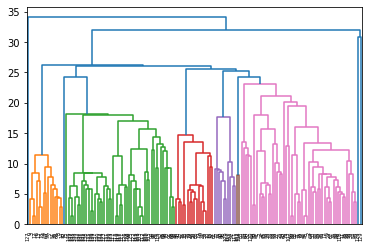

In [7]:
iliski=linkage(model.children_)
k=dendrogram(iliski)
#print(type(k))
print(len(set(k['leaves_color_list'])))
#print(k.keys())  
#print("Number of detected clusters={}".format(len(set(k['leaves_color_list']))))

In [ ]:
print(x.iloc[124,:])
print(x.iloc[127,:])
print(x.iloc[129,:])

## 5. Hiyerarşik Olmayan Kümeleme

In [8]:
print('\n Analiz Sonuçları \n')

kmeans = KMeans(n_clusters=sinif, random_state=0)
kmeans=kmeans.fit(x)
sonuc=kmeans.labels_
print('Kümelenmiş Veri \n',sonuc)

sonuc=[0 if sonuc[i]==1 else(1 if sonuc[i]==0 else 2) for i in range(len(sonuc))]
print('Yeni Kümelenmiş Veri \n',sonuc)

le=LabelEncoder()
le.fit(y)
y_new=le.transform(y)
print('Şifrelenmiş Veri \n',y_new)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_new,sonuc))


 Analiz Sonuçları 

Kümelenmiş Veri 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Yeni Kümelenmiş Veri 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]
Şifrelenmiş Veri 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1

## 6. PCA ile Boyut Düşürme  

[0.92461621 0.05301557]


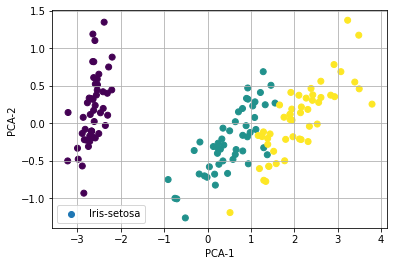

In [9]:
pca=PCA(2)
pca.fit(x)
x_pca=pca.transform(x)
x_pca=pd.DataFrame(x_pca,columns=['PCA-1','PCA-2'])
print(pca.explained_variance_ratio_)

plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1],c=y_new)
plt.xlabel(x_pca.columns[0])
plt.ylabel(x_pca.columns[1])
plt.legend(list(y.unique()))
plt.grid(True)


 Optimal Temel Eksen Sayısı = 2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA-1   150 non-null    float64
 1   PCA-2   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


,PCA-1,PCA-2
0,-1.305903,0.663590
1,-1.321074,-0.344500
2,-1.405936,-0.279054
3,-1.336179,-0.632132
4,-1.327497,0.678457
...,...,...
145,0.945790,0.380784
146,0.742256,-0.761955
147,0.858232,0.159533
148,0.925168,0.235435


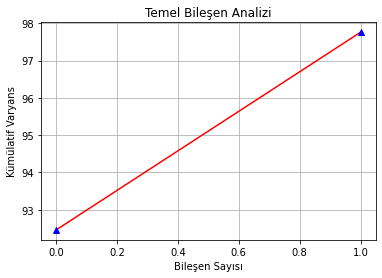

In [10]:
pca_list=[]
for j in range(x.shape[1]-1):
    pca=PCA(j+1,whiten=True)
    pca.fit(x)
    x_pca=pca.transform(x)
    pca_list.append(float("{:.2f}".format(100*sum(pca.explained_variance_ratio_))))

# Constructing PCA for the Dataset if Variance Ratio is Greater than or Equal to 0.98
    if sum(pca.explained_variance_ratio_)>0.97:
        embedded_dimension=j+1
        print("\n Optimal Temel Eksen Sayısı = {} \n".format(j+1))
        dataframe_pca=pca.transform(x)
        break
        
plt.figure("Temel Bileşen Analizi")
plt.plot(pca_list,'-r')
plt.plot(pca_list,'^b')
plt.title("Temel Bileşen Analizi")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans")
plt.grid(True)

baslik=[]
# Yeni dataframe oluşturma
for i in range(embedded_dimension):
  baslik.append('PCA-{}'.format(i+1))

x_pca=pd.DataFrame(x_pca,columns=baslik)
x_pca.info()
x_pca

## 7. Yeni Veri Kümesinin Gösterimi

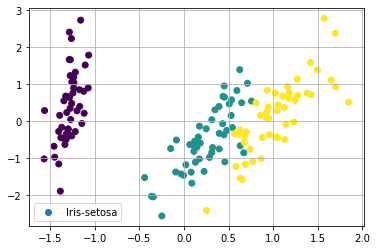

In [ ]:
fig = plt.figure('Kümeleme Analizleri')
plt.scatter(x_pca.iloc[:,0],x_pca.iloc[:,1], c=y_new)
plt.legend(list(y.unique()))
plt.grid(True)

# Gözetimli Öğrenme

Gözetimli öğrenmede sınıflandırma ve regresyon algoritmalarıyla etiketli veri üzerinden işlemleri yapılabilir.
En yaygın kullanılan algoritmalar:
1. Naive Bayes
2. Lojistik Regresyon
3. Destek Vektör Makineleri
4. Karar Ağaçları
5. Bagging Algoritmaları (Rastgele Orman)
6. Boosting Algoritmaları (AdaBoost,Gradient Boost,XGBoost) 
7. Yapay Sinir Ağları

## 1. İkili Sınıflandırma için etiket verisi oluşturma

In [11]:
y_bin=[0 if y[i]=='Iris-setosa' else 1 for i in range(len(y))]

## 2. Tekli Analizler için Veriyi Eğitim-Test Olarak Bölme

In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

sc=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x_pca,y_bin,test_size=0.2,shuffle=True)

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## 3. Naive Bayes ile Sınıflandırma

In [24]:
from sklearn.naive_bayes import GaussianNB

sinif_1=GaussianNB()
sinif_1.fit(x_train,y_train)
y_bayes=sinif_1.predict(x_test)

print('\n Naive Bayes Algoritması Sınıflandırma Sonuçları \n')
print(confusion_matrix(y_test,y_bayes))


 Naive Bayes Algoritması Sınıflandırma Sonuçları 

[[11  0]
 [ 0 19]]


## 4. Lojistik Regresyon ile Sınıflandırma


In [25]:
from sklearn.linear_model import LogisticRegression

sinif_2=LogisticRegression()
sinif_2.fit(x_train,y_train)
y_lr=sinif_2.predict(x_test)

print('\n Lojistik Regresyon Parametreleri\n')
print('\n Katsayılar={} \n'.format(sinif_2.coef_))
print('\n Kesişim={} \n'.format(sinif_2.intercept_))
print('\n Lojistik Regresyon Algoritması Sınıflandırma Sonuçları \n')
print(confusion_matrix(y_test,y_lr))


 Lojistik Regresyon Parametreleri


 Katsayılar=[[ 3.4986417 -0.76063  ]] 


 Kesişim=[1.88755935] 


 Lojistik Regresyon Algoritması Sınıflandırma Sonuçları 

[[11  0]
 [ 0 19]]


In [ ]:
denek=[-1.5,0.8]
denek=np.array(denek).reshape(1,-1)
print(sinif_2.predict(denek))

[0]


## 5. Destek Vektör Makineleri ile Sınıflandırma

In [26]:
from sklearn.svm import SVC

sinif_3=SVC(kernel='linear')
sinif_3.fit(x_train,y_train)
y_svc=sinif_3.predict(x_test)

print('\n Destek Vektör Makineleri Algoritması Sınıflandırma Sonuçları \n')
print(confusion_matrix(y_test,y_svc))


 Destek Vektör Makineleri Algoritması Sınıflandırma Sonuçları 

[[11  0]
 [ 0 19]]


# 6. KNN ile Sınıflandırma

In [27]:
from sklearn.neighbors import KNeighborsClassifier

sinif_4=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
sinif_4.fit(x_train,y_train)
y_knn=sinif_4.predict(x_test)

print('\n K-En yakın Komşular Algoritması Sınıflandırma Sonuçları \n')
print(confusion_matrix(y_test,y_knn))


 K-En yakın Komşular Algoritması Sınıflandırma Sonuçları 

[[11  0]
 [ 0 19]]


# 7. Model Doğruluğu Kontrol Etme (Precision, Recall, F1 Skorları)

In [28]:
from sklearn.metrics import precision_recall_fscore_support

precision=precision_recall_fscore_support(y_test,y_knn)
print("Kesinlik=",precision[0])
print("Çağırma=",precision[1])
print("F1=",precision[2])

Kesinlik= [1. 1.]
Çağırma= [1. 1.]
F1= [1. 1.]


In [29]:
precision

(array([1., 1.]), array([1., 1.]), array([1., 1.]), array([11, 19]))

# 8. ROC-AUC Skoru 

In [30]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_test,y_knn)
print("Eğri altında kalan alan={:.2f}".format(roc_auc))

Eğri altında kalan alan=1.00


# 8. Çapraz Geçerlilik Kuralı

In [34]:
from sklearn.model_selection import cross_val_score

skor_nb=cross_val_score(sinif_1,x_pca,y, cv=10)
print(skor_nb)

[0.8        0.93333333 0.93333333 0.93333333 0.93333333 0.73333333
 1.         0.86666667 0.93333333 0.93333333]
